In [164]:
import numpy as np
class perceptron:
    
    def __init__(self, epochs = 100, learning_rate = 0.01):
        
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.coef = None
        self.intercept = None
        
    def fit(self, X_train, Y_train):
        
        X_train = np.insert(X_train, 0, 1, axis = 1)
        self.weights = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            j = np.random.randint(X_train.shape[0])
            y_hat = self.step(np.dot( X_train[j],self.weights))
            self.weights = self.weights + self.learning_rate*(Y_train[j] - y_hat)*X_train[j]
            
        self.coef = self.weights[1:]
        self.intercept = self.weights[0]
        return self.coef, self.intercept
        
        
        
    def step(self, z):
        
        return 1 if z>0 else 0
    
    def predict(self, X_test):
        
        arr = []
        for a in X_test:
            result = self.step(np.dot(a, self.coef) + self.intercept)
            arr.append(result)
        return arr
    
    def plotx(self,X, Y):
        m = -(self.coef[0]/self.coef[1])
        b = -(self.intercept/self.coef[1])
        x_input = np.linspace(-3,3,100)
        y_input = m*x_input + b
        plt.figure(figsize=(10,6))
        plt.plot(x_input,y_input,color='red',linewidth=3)
        plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
        plt.ylim(-3,2)
        

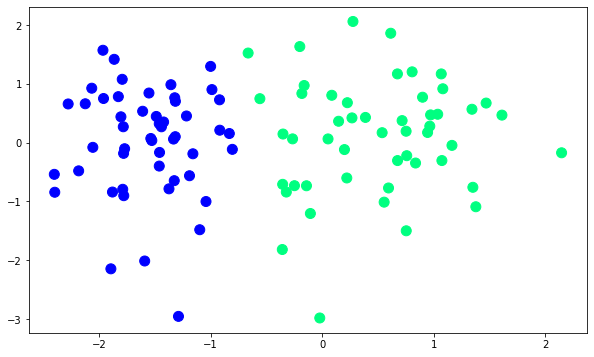

In [163]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)


In [165]:
perc1= perceptron(epochs = 1000, learning_rate=0.1)

In [166]:
perc1.fit(X,y)

(array([1.39255766, 0.19739528]), 1.0)

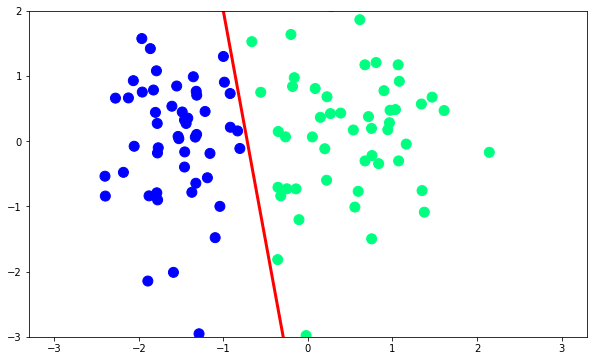

In [167]:
perc1.plotx(X,y)